# 부산시 도시철도 데이터 분석하기
---
#### 작성자 : 1718772 오성혁, 과제에 도움을 준 학생(과제 3-5부분) : 1708164 김종호
---
현재 부산시는 부산교통공사(https://www.humetro.busan.kr/) 을 도입하여 도시철도(지하철)에 대한 정보를 제공하고 있다. 제공되는 데이터는 시간대 별로 분리된 __이산적인 데이터__이며, 각 데이터는 시간대,노선 등 구분되어 제공된다.

데이터 중에서, 하단역의 시간대별 승,하차 데이터는 부산시민이 하단역에 밀집되는 시간을 파악할 수 있다.

학습한 이산수학의 이론을 데이터에 적용하여, 우리는 대중교통 관련된 문제를 해소하기 위한 아이디어를 고찰하며 이를 실현화하기 위한 프로토타입(prototype)을 구현해본다.

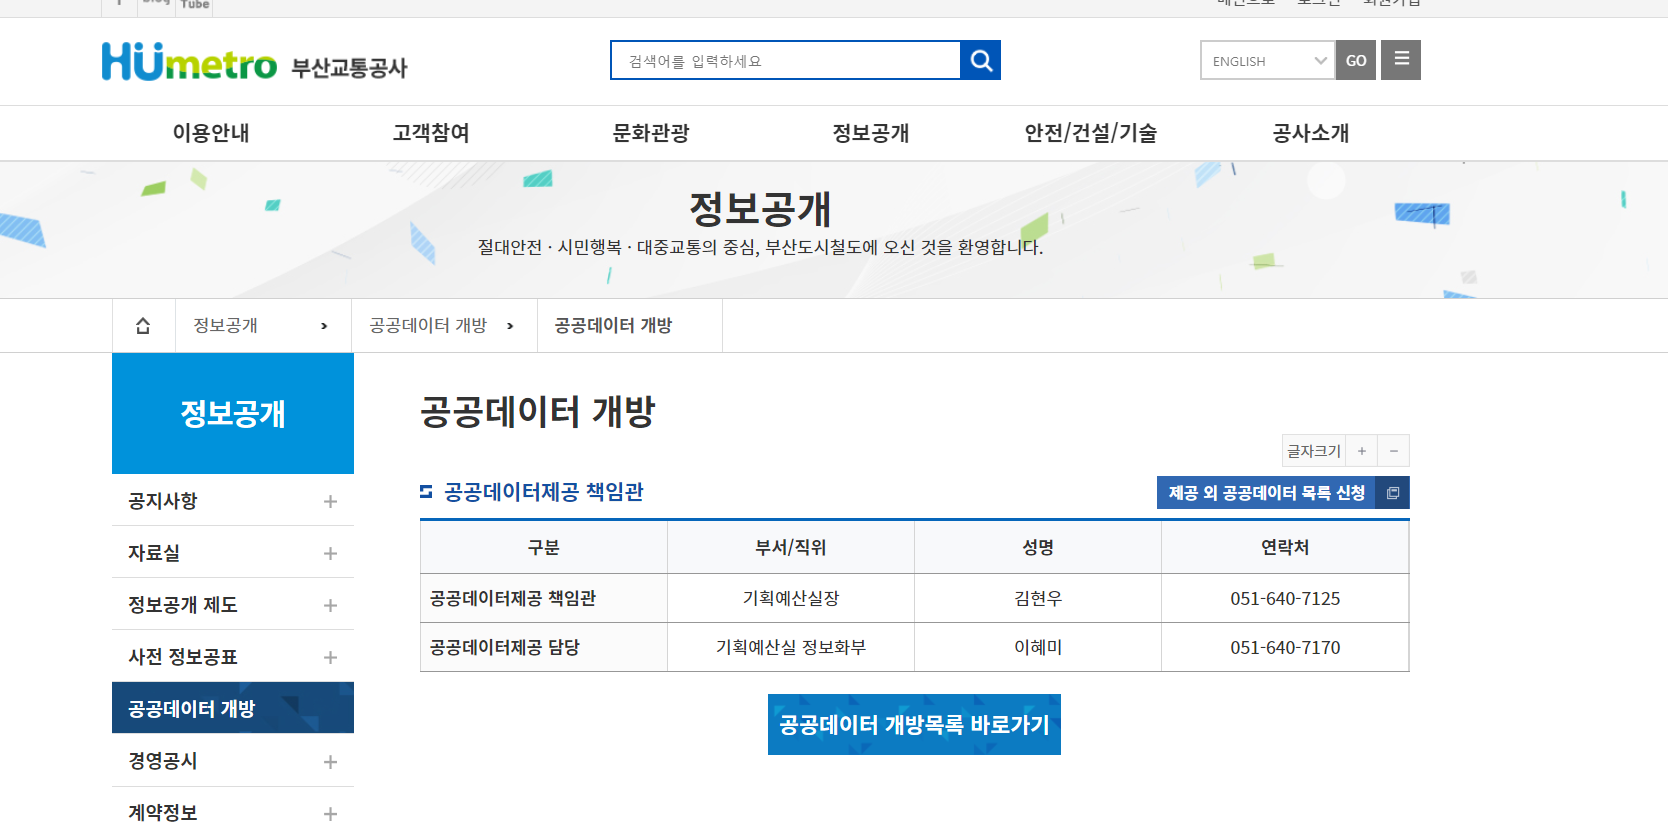


## 필수확인 사항: 
아래 링크에서 "부산교통공사_시간대별 승하차인원_20210801.csv" 파일을 다운로드 받으시기 바랍니다.
https://drive.google.com/file/d/18zfvIhNY0vemBaMyexRroewsyPzuOIkR/view?usp=sharing

파일을 올리는 방법은 다운로드한 파일을 왼쪽 탭의 폴더 아이콘을 클릭한 뒤, 파일을 해당 장소에 드래그앤 하거나 업로드 아이콘을 클릭하여 업로드 하시면 됩니다

## 제출 안내
---
필수: 모든 셸에 대해서 정상적인 출력이 되도록 프로그램 실행
제출마감일: ~10.25일까지 제출
제출장소: 정상출력된 결과물(.ipynb)을 가상대학 (HW1-3과제) 란에 개별적으로 업로드
기타 안내: 파일명 변경은 자유
---

# HW1. 판다스(pandas)의 데이터프레임(Dataframe) 다루기 


본 과제는 판다스의 데이터 프레임을 조직을 목표합니다.
csv,json 파일 읽기, 필요 데이터 추출 및 필터, 그룹화 및 통계 계산하기를 학습할 예정입니다.

```각 과제는 아래 세부 과제들로 구성됩니다,```

다음은 pandas 라이브러리를 임포트(import)합니다.

In [1]:
import pandas as pd

In [2]:
import pandas as pd
df=pd.read_csv("부산교통공사_시간대별 승하차인원_20210801.csv", encoding="cp949")
df

역번호       역명         년월일  구분  ...  21시-22시  22시-23시  23시-24시  24시-01시
0       95  다대포해수욕장  2021-01-01  승차  ...       55       20        7        0
1       95  다대포해수욕장  2021-01-01  하차  ...       57       34       21       13
2       95  다대포해수욕장  2021-01-02  승차  ...       64       26        1        0
3       95  다대포해수욕장  2021-01-02  하차  ...       81       48       20       13
4       95  다대포해수욕장  2021-01-03  승차  ...       43       25        6        0
...    ...      ...         ...  ..  ...      ...      ...      ...      ...
54427  414     안  평  2021-08-29  하차  ...       33       25       10        5
54428  414     안  평  2021-08-30  승차  ...       18       13        2        0
54429  414     안  평  2021-08-30  하차  ...       41       31       15        9
54430  414     안  평  2021-08-31  승차  ...       17        9        2        0
54431  414     안  평  2021-08-31  하차  ...       52       42       10       12

[54432 rows x 29 columns]

데이터의 컬럼은 역번호, 역명, 년월일, 구분, 승/하차 인원 일일합계, 각 시간대별 승/하차 인원으로 구성됩니다.

__df.head(10)__ 명령어를 호출하여 상위 10개의 데이터를 불러옵니다.

In [3]:
df.head(5)

역번호       역명         년월일  구분  ...  21시-22시  22시-23시  23시-24시  24시-01시
0   95  다대포해수욕장  2021-01-01  승차  ...       55       20        7        0
1   95  다대포해수욕장  2021-01-01  하차  ...       57       34       21       13
2   95  다대포해수욕장  2021-01-02  승차  ...       64       26        1        0
3   95  다대포해수욕장  2021-01-02  하차  ...       81       48       20       13
4   95  다대포해수욕장  2021-01-03  승차  ...       43       25        6        0

[5 rows x 29 columns]

## ■ 문제 1-1. 데이터 프레임의 레코드 수를 출력할 것.
데이터 프레임의 레코드 수(Row의 수)와 필드 수(Column)를 각각 출력하여라
```
데이터프레임의 __shape__ 메소드는 데이터의 차원을 표현합니다

참조: https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.shape.html`
```


In [4]:
# df.shape --> 2차원 구조
row=df.shape[0]         #행
column=df.shape[1]      #열
print("(",str(row),",",str(column),")")

( 54432 , 29 )


In [5]:
row=df.shape[0] #행
row

54432

In [6]:
column=df.shape[1] #열
column

29

## ■ 문제 1-2. 데이터프레임의 표현적인 통계(descriptive statistics) 보기
주어진 데이터프레임의 표현적인 통계를 출력하시오 

```
Descriptive statistics이란? 데이터의 분포의 모양, 퍼짐 정도, 중앙에 몰리는 정도. 최대, 최소값, 평균 을 한눈에 보여주도록 합니다.

참조 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
```


In [7]:
df.describe() #데이터프레임의 표현적인 통계

역번호            합계  ...       23시-24시       24시-01시
count  54432.000000  54432.000000  ...  54432.000000  54432.000000
mean     217.696429   6001.938125  ...     62.917604     10.903421
std       96.589932   4817.111320  ...     72.383265     14.248733
min       95.000000     49.000000  ...      0.000000      0.000000
25%      122.750000   2628.000000  ...     19.000000      2.000000
50%      216.500000   4486.500000  ...     43.000000      6.000000
75%      302.250000   8083.000000  ...     84.000000     14.000000
max      414.000000  42783.000000  ...   1870.000000    178.000000

[8 rows x 26 columns]

## ■ 문제 1-3. 데이터프레임의 하위 n개 출력
주어진 데이터프레임의 하위 n개의 데이터를 출력하여라

In [8]:
df.tail(10) #하위10개항목만 보기

역번호    역명         년월일  구분  ...  21시-22시  22시-23시  23시-24시  24시-01시
54422  414  안  평  2021-08-27  승차  ...       19        8        4        0
54423  414  안  평  2021-08-27  하차  ...       57       46       29       12
54424  414  안  평  2021-08-28  승차  ...       22       10        2        0
54425  414  안  평  2021-08-28  하차  ...       54       37       18       11
54426  414  안  평  2021-08-29  승차  ...       17        7        1        0
54427  414  안  평  2021-08-29  하차  ...       33       25       10        5
54428  414  안  평  2021-08-30  승차  ...       18       13        2        0
54429  414  안  평  2021-08-30  하차  ...       41       31       15        9
54430  414  안  평  2021-08-31  승차  ...       17        9        2        0
54431  414  안  평  2021-08-31  하차  ...       52       42       10       12

[10 rows x 29 columns]

## ■ 문제 1-4. 데이터프레임 내 특정 필트(COLUMN) 및 특정 레코드(ROW) 선택하기 (2문제)

```
참조: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
```

In [9]:
df_t=df[["역번호","역명","구분","08시-09시"]]  #데이터프레임에서 역번호, 역명,구분,08시-09시의 값을 뽑는다.

In [10]:
df_sub=df_t[18954:28955]  #뽑아낸 값중 index 18959번(노 포) 부터 10000개를 뽑아 저장한다. 
df_sub 

역번호    역명  구분  08시-09시
18954  134  노  포  승차      136
18955  134  노  포  하차      258
18956  134  노  포  승차      224
18957  134  노  포  하차      341
18958  134  노  포  승차      118
...    ...   ...  ..      ...
28950  220  부  암  승차      236
28951  220  부  암  하차      130
28952  220  부  암  승차      800
28953  220  부  암  하차      777
28954  220  부  암  승차      771

[10001 rows x 4 columns]

## ■ 문제 1-5. 데이터프레임의 특정 필드에 따른 그룹화 및 평균 구하기
df_sub에서 승하차의 구분에 따른 평균을 구하여라.
df_sub에 재저장할 필요없으며, 계산된 역번호는 무시해도 된다 

```
참고: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
```

In [11]:
df_sub.groupby("구분",as_index=True).mean()
# groupby함수를 사용하여 df_sub에 저장되어 있는 데이터중 구분(승,하차)을 row에 넣고 그것을 기준으로 table를 작성한다. as_index에 True값을 넣으면 index값이 표시가 안되며, mean함수를 사용하여면 값의 평균을 나타내어진다.

역번호     08시-09시
구분                        
승차  206.589082  619.458108
하차  206.586400  715.753600

## ■ 문제 1-6 데이터프레임의 그룹함수 적용하기(최대, 최소, 평균 등)
승하차 중 최소/최대 인원을 갖는 데이터 구하기

최소: 1동래역이 최소인원 1명이다

최대: 화 명역은 08-09시에 4228명이 하차한다.

```
DataFrame을 데이터 그룹화 시키기 함수: groupby()
- Series의 데이터 그룹화 : 특정열 인덱싱.groupby(기준열 인덱싱)
- DataFrame의 데이터 그룹화 : df.groupby("기준이 될 컬럼명")를 통해 특정열이 아닌, df의 모든 열에 대해 계산
ex) grouped = df['index'].groupby(df['key']) = df['index']를 df['key']기준으로 데이터 그룹화시키고 그 결과를 grouped에 저장 
추가적으로, grouped.mean()을 적용하여 평균을 구할 수 있다.
```

In [12]:
df_sub.groupby("구분",as_index=True).min()
# groupby함수를 사용하여 df_sub에 저장되어 있는 데이터중 구분(승,하차)을 row에 넣고 그것을 기준으로 table를 작성한다. as_index에 True값을 넣으면 index값이 표시가 안되며, min함수를 사용하면 값의 최소값을 나타내어진다.

역번호   역명  08시-09시
구분                   
승차  134  2서면       33
하차  134  2서면       22

In [13]:
df_sub.groupby("구분",as_index=True).max()
# groupby함수를 사용하여 df_sub에 저장되어 있는 데이터중 구분(승,하차)을 row에 넣고 그것을 기준으로 table를 작성한다. as_index에 True값을 넣으면 index값이 표시가 안되며, max함수를 사용하면 값의 최댓값을 나타내어진다.

역번호   역명  08시-09시
구분                   
승차  220  해운대     2253
하차  220  해운대     3374

## ■ 문제 1-7 데이터프레임의 특정 값을 필터링 하기
df 데이터프레임으로부터 하단역(102)에 대한 승하차정보만 갖도록 필터링 하시오

꼭 역번호(102)로 검색하시고, df_hadan 으로 저장하면됩니다

df_hadan의 shape는 486 rows × 29 columns 입니다

```
특정 컬럼값을 만족하는 데이터프레임을 출력하기
df.loc[df['column_name'] == some_value]

```

In [14]:
df_hadan=df.loc[df["역번호"]==102]
df_hadan

역번호    역명         년월일  구분  ...  21시-22시  22시-23시  23시-24시  24시-01시
3402  102  하  단  2021-01-01  승차  ...      268      124       36        6
3403  102  하  단  2021-01-01  하차  ...      252      140       82       23
3404  102  하  단  2021-01-02  승차  ...      289      135       55       10
3405  102  하  단  2021-01-02  하차  ...      341      155       87       30
3406  102  하  단  2021-01-03  승차  ...      297      102       23        5
...   ...   ...         ...  ..  ...      ...      ...      ...      ...
3883  102  하  단  2021-08-29  하차  ...      422      215      122       30
3884  102  하  단  2021-08-30  승차  ...      506      207       36        1
3885  102  하  단  2021-08-30  하차  ...      374      256      140       29
3886  102  하  단  2021-08-31  승차  ...      538      237       65        3
3887  102  하  단  2021-08-31  하차  ...      450      283      123       30

[486 rows x 29 columns]

## ■ 문제 1-8 실제 데이터값에 기반한 서브데이터 추출(Boolean indexing)
두 가지 이상의 필터를 혼합하여 8-9시와 18시-19시에 각각 1000명이상, 2000이상 데이터만 추출하시오. 

참고로 __승차__한 데이터만 29건이 발생합니다.

```
cond_A = (df['column_name'] > 1000)
cond_B = (df['column_name'] > 2000)
df_hadan_sub1 = df_hadan.loc [cond_A & cond_B]
```

In [15]:
cond_A=df_hadan["08시-09시"]>1000             #df_hadan데이터에서 "08시~09시"column중 1000인 값만 cond_A에 저장
cond_B=df_hadan["18시-19시"]>2000             #df_hadan데이터에서 "18시-19시"column값중 200이상인 값만 cond_B에 저장
df_hadan_sub1=df_hadan.loc[(cond_A & cond_B)] #cond_A,cond_B를 만족하는 값을 df_hadan데이터으로부터 불러와 저장
print("(",df_hadan_sub1.shape[0],",",df_hadan_sub1.shape[1],")") #df_hadan_sub1의 행과열의 갯수를 출력 (행,열)

( 29 , 29 )


# HW2. 논리식(Logic expression)에 대한 라이브러리 사용 및 Matplotlib를 사용한 데이터 시각화

pyprover는 first-order predicate logic에 대한 증명을 파이썬 라이브러리 입니다. 슬라이드 33페이지에 있는 추론에 대해서 설명합니다.
Matplotlib은 주로 2D 그래프 차트를 위한 패키지로, 출판물 수준의 그래프를 만들어내도록 지원합니다. pdf, svg, jpg 등의 벡터 및 레스터 포맷으로 출력이 가능합니다

pyprover 라이브러리 설치하기

In [16]:
!pip install pyprover

pyprover 임포트 하기

In [17]:
from pyprover import *

추론법칙에 대해서 알아봅니다. 2장 수학적 모델과 논리 슬라이드 33-34페이지에 대한 실습입니다

simplication
단순화
(P ^ Q) → P

In [18]:
given = (P&Q)
conclu = P
print("true") if proves( given, conclu ) else print("false")

true


후건 부정(부정 논법) modus tollen

In [19]:
given = (~Q&(P>>Q))
conclu = ~P
print("true") if proves( given, conclu ) else print("false")

true


구성적 양도 논법 constructive dilemma

In [20]:
# proves( given, conclusion )
given = ((P>>Q)&(R>>S)&(P|R))
conclu = Q|S

print("true") if proves( given, conclu ) else print("false")

true


In [21]:
given = (((P>>Q) & (R>>S)) & (~Q|~S))
conclu = ~P|~R
print("true") if proves( given, conclu ) else print("false")

true


## ■ 문제 2-1. 전건 긍정 modus ponens

In [22]:
given=(P&(P>>Q))
conclu=Q
print("True") if proves(given,conclu) else print("Fasle")

True


## ■ 문제 2-2. 가언 삼단 논법 hypothetical syllogism

In [23]:
given=((P>>Q)&(Q>>R))
conclu=(P>>R)
print("True") if proves(given,conclu) else print("False")

True


## ■ 문제 2-3. 술어 논리 predicate logic
TE는 Exist(∃x)를 의미하고 FA는 ForAll(∀x)를 의미하는 한정자이다. 이 한정자를 predicate logic(술어 로직)와 함께 사용하는 예제를 살펴보자. (본 예제는 실행하기만 하면 됩니다)
```
Statement: Not all students like homework
Negation: There is at leat one student who does not like homework
```

In [24]:
# x: studnet, P: isHomeworkLikable(x)
given = ~(FA(x,P(x))) # not all studnet like homwork -- 학생들 모두는 과제를 좋아하는 것이 아님
conclu = TE(x,~P(x)) # There is at least one student who does not like homwork -- 학생들중 일부는 과제를 싫어하는 학생이 존재함
print("True") if proves(given,conclu) else print("False")

True


Matplotlib 를 사용하기
Matplotlib는 그래프 차트등을 표현하는 저수준 라이브러리이다. 좀더 진보된 라이브러리를 원한다면, seaborn 등을 참고하면 좋다.

In [25]:
# matplotlib이 없는 경우, 주석을 지우고 실행
# !pip install -U matplotlib

In [26]:
#matplotlib 임포트하기.
import matplotlib.pyplot as plt
import numpy as np


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

x축에 데이터를 쉽게 반영하기 위한 인덱스 설정

In [27]:
df_hadan.set_index(["구분","년월일"])

역번호    역명     합계  01시-02시  ...  21시-22시  22시-23시  23시-24시  24시-01시
구분 년월일                                    ...                                    
승차 2021-01-01  102  하  단   5351        0  ...      268      124       36        6
하차 2021-01-01  102  하  단   5079        0  ...      252      140       82       23
승차 2021-01-02  102  하  단   8208        0  ...      289      135       55       10
하차 2021-01-02  102  하  단   7678        0  ...      341      155       87       30
승차 2021-01-03  102  하  단   5683        0  ...      297      102       23        5
...            ...   ...    ...      ...  ...      ...      ...      ...      ...
하차 2021-08-29  102  하  단   7949        0  ...      422      215      122       30
승차 2021-08-30  102  하  단  16281        0  ...      506      207       36        1
하차 2021-08-30  102  하  단  14578        0  ...      374      256      140       29
승차 2021-08-31  102  하  단  16087        0  ...      538      237       65        3
하차 2021-08-31  102  하  단  14508        2  ...      450      283      123       30

[486 rows x 27 columns]

기본적인 데이터프레임의 시각화는 plot() 명령어를 사용하여 쉽게 변경할 수 있다.
```
df.plot(figsize=(12,12))
그림 size가 12x12 크기이다.
```

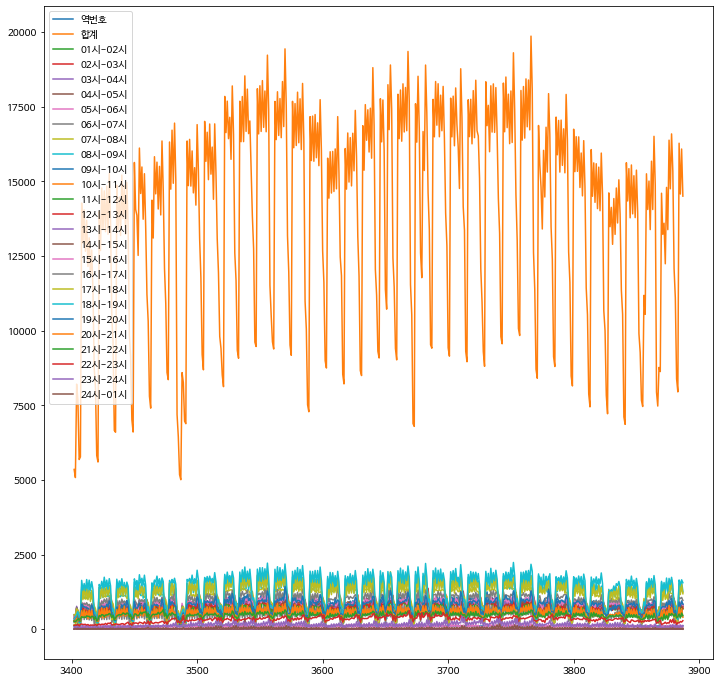

In [28]:
df_hadan.plot(figsize=(12,12)) #그림의 size를 12*12로 설정

우리는 여러 개의 그래프를 그리고자 한다.

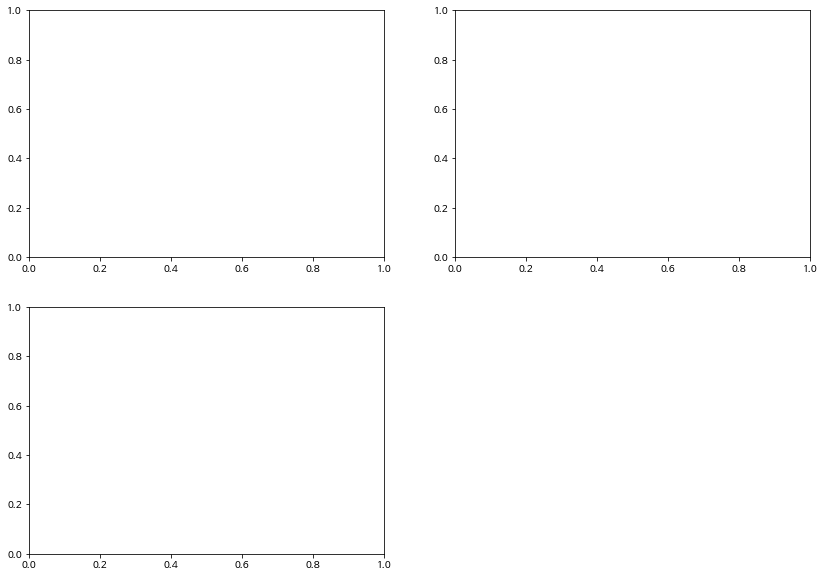

In [29]:
fig= plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

예를 들면 다음과 같이 3번째 그래프 차트에 x,y 값을 추가할 수 있다.
```
https://matplotlib.org/
```

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


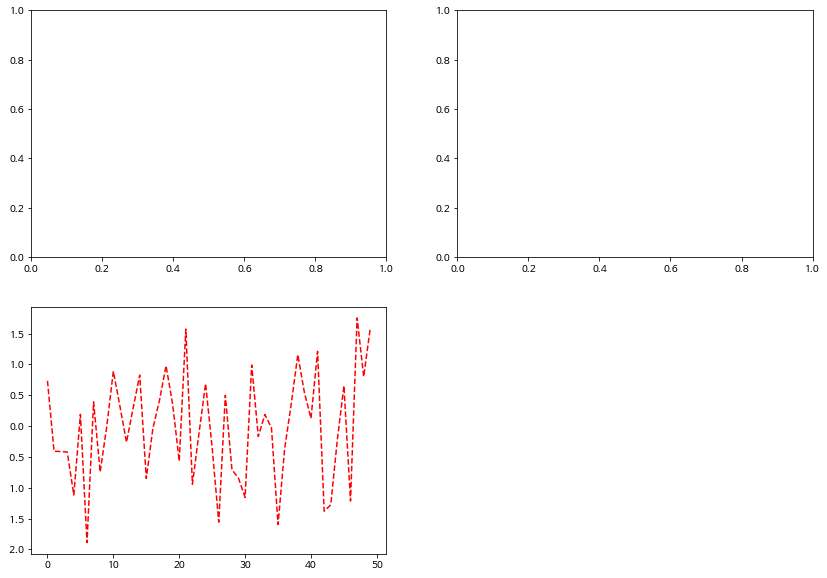

In [30]:
x = np.arange(50)
y = np.random.randn(50)
ax3.plot(x, y, 'r--')
fig

## ■ 문제 2-4 승,하차 인원에 대한 그래프 출력
하단역 승하차 데이터로(df_hadan)부터 **일자별 승차 합계인원**에 대한 그래프를 그리고자 한다.
x축은 일자 혹은 관련된 index 값이어도 무방하며, y축은 승차인원의 합계가 나와야함
ax1 에 그래프를 생성하시오

In [31]:
#1번
# df_hadan=df_hadan.loc[df_hadan["구분"]=="승차"]

# ax= df_hadan.set_index(["년월일"]).plot(figsize=(15, 15), legend=False, fontsize=12, y="합계")

# ax.set_xlabel('day', fontsize=12)          # x축 정보 표시
# ax.set_ylabel('Total number of rides.', fontsize=12)     # y축 정보 표시


#2번
# df_hadan=df_hadan.loc[df_hadan["구분"]=="승차"]
# hadan=df_hadan["년월일"]
# x=list(hadan.values)

# hadan1=df_hadan["합계"]
# y=list(hadan1.values)

# ax1.plot(x,y,"b-")
# fig

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


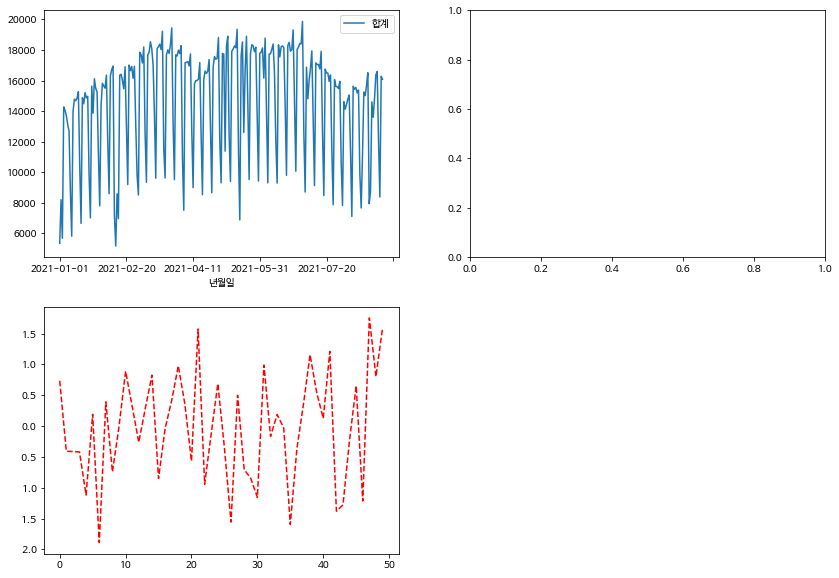

In [32]:
df_hadan_ride=df_hadan.loc[df_hadan["구분"]=="승차"]
df_hadan_ride
df_temp=df_hadan_ride[["년월일","합계"]]
df_temp=df_temp.set_index(["년월일"])
df_temp.plot(ax=ax1)
fig


## ■ 문제 2-5 특정 조건에 따른 승,하차 그래프 만들기
df_hadan 으로부터, **승차 인원이 10000명 이상인** 데이터만 추출하여 그래프 생성하기


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


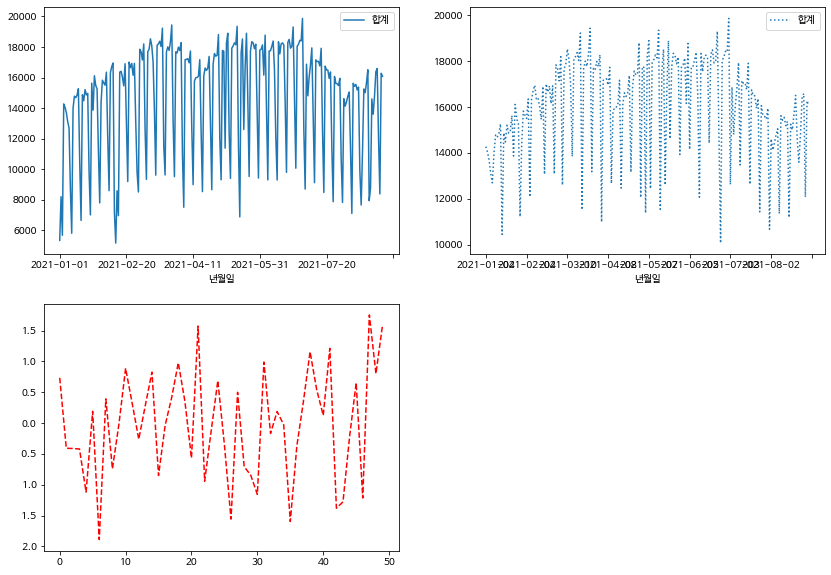

In [33]:
df_temp_2=df_hadan_ride[["년월일","합계"]]
df_temp_2=df_temp_2.loc[df_temp_2["합계"]>=10000]
df_temp_2=df_temp_2.set_index(["년월일"])
df_temp_2.plot(ax=ax2, linestyle="dotted")
fig

그래프 차트 스타일 변경 및 스타일 적용하기
그래프에는 여러 가지 속성이 존재한다. 그래프 유형은 막대, 선, 원그래프 등이 있고, 그래프 속성은 x축,y축 레이블, 제목, 범례(legend), x/y축의 눈금(tick), 최소 최대값 등이 있다.

iloc를 사용하여 첫번째 행과 01시-02시 데이터부터 24시-01시 데이터까지가져오자
```
df.iloc[start_row:end_row, start_col:end_col]
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
```

In [34]:
df_hadan0=df_hadan.iloc[0:2,5:]
df_hadan0

01시-02시  02시-03시  03시-04시  04시-05시  ...  21시-22시  22시-23시  23시-24시  24시-01시
3402        0        0        0       14  ...      268      124       36        6
3403        0        0        0        2  ...      252      140       82       23

[2 rows x 24 columns]

## ■ 문제 2-6. Column과 Rows 값을 서로 변경하시오
Transpose 메소드를 사용하여 column에 있는 데이터를 행의 값으로 변환합니다

In [35]:
df_hadan_transpose=df_hadan0.transpose()
df_hadan_transpose

3402  3403
01시-02시     0     0
02시-03시     0     0
03시-04시     0     0
04시-05시    14     2
05시-06시    44    20
06시-07시   129   147
07시-08시   156   166
08시-09시   226   236
09시-10시   258   230
10시-11시   251   241
11시-12시   292   297
12시-13시   356   315
13시-14시   449   332
14시-15시   403   376
15시-16시   459   429
16시-17시   489   438
17시-18시   479   469
18시-19시   336   402
19시-20시   292   251
20시-21시   284   231
21시-22시   268   252
22시-23시   124   140
23시-24시    36    82
24시-01시     6    23

## ■ 문제 2-7. 그래프의 스타일 속성을 지정하시오
df_hadan_transpose 를 막대(bar) 그래프 차트를 사용하여 그리시오
그래프에 대한 x축 레이블(label)은 '시간대'로 y축 레이블은 승하차 인원, 제목(title)은 '시간대별 승하차 인원'으로 작성하시오

Text(0, 0.5, '승하차 인원')

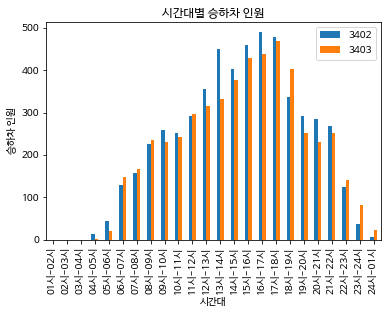

In [36]:
ax=df_hadan_transpose.plot.bar()
ax.set_title("시간대별 승하차 인원")
ax.set_xlabel("시간대")
ax.set_ylabel("승하차 인원")

다음과 같이 이미지 파일로 내보내기가 가능하다
```
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
```

In [37]:
plt.savefig("bar_chart.png")

<Figure size 432x288 with 0 Axes>

# HW3. 데이터에 집합(Set)연산 적용하기 및 구글 드라이브와 연동하기
- 주어진 데이터셋들간에 교집합,차집합,합집합 연산을 적용해보기
- 구글 드라이브와 연동하여 파일을 쉽게 읽을 수 있도록 하기
- 구글드라이브로 공유된 파일들을 쉽게 사용하도록 하기

구글 드라이브 연동 방법
아래 코드를 실행시켜서 구글 드라이브를 마운팅 합니다. 마운팅하기 위해서는 웹브라우저를 통해 주어진 키를 복사하여 코드쉘안에 복사하여 붙여넣습니다.
구글 Colab은 기본적으로 Colab 라이브러리를 포함하고 있습니다.

In [38]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## ■ 문제 3-1 구글 드라이브에서 기존의 csv 파일 불러오기 및 상위 10개 출력
자신의 구글드라이브에 아래 파일을 업로드한 뒤에, csv파일 데이터셋 불러오기를 수행하시오.
부산교통공사_시간대별 승하차인원_20210801.csv


In [39]:
import pandas as pd
filename="/content/gdrive/MyDrive/부산교통공사_시간대별 승하차인원_20210801.csv"
my_df = pd.read_csv(filename, encoding="cp949")
my_df.head(10)

역번호       역명         년월일  구분  ...  21시-22시  22시-23시  23시-24시  24시-01시
0   95  다대포해수욕장  2021-01-01  승차  ...       55       20        7        0
1   95  다대포해수욕장  2021-01-01  하차  ...       57       34       21       13
2   95  다대포해수욕장  2021-01-02  승차  ...       64       26        1        0
3   95  다대포해수욕장  2021-01-02  하차  ...       81       48       20       13
4   95  다대포해수욕장  2021-01-03  승차  ...       43       25        6        0
5   95  다대포해수욕장  2021-01-03  하차  ...       65       32       21        9
6   95  다대포해수욕장  2021-01-04  승차  ...       57       41        6        0
7   95  다대포해수욕장  2021-01-04  하차  ...      105       55       21       10
8   95  다대포해수욕장  2021-01-05  승차  ...       49       42        9        0
9   95  다대포해수욕장  2021-01-05  하차  ...      115       63       27       22

[10 rows x 29 columns]

구글드라이브로 공유된 파일을 접근하기
아래 코드는 공유 파일사용하기 위한 코드이니 그대로 사용하시면 됩니다.

In [40]:
# pyDrive 설치
!pip install -U -q PyDrive

In [41]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## ■ 문제 3-2. 구글드라이브 파일 공유하고 해당 파일을 읽어오기
구글 드라이브 내 URL 기반 공유를 수행하고 해당 파일을 정상적으로 다운로드되는지 확인할
구글드라이브 id를 찾아서 아래 코드에 대입하여 실행시키시기 바랍니다

예) 공유된 폴더 링크가 다음과 같다면 https://drive.google.com/drive/folders/1-EJr-anFISoVb96QYedLx5PklEtm9JSS?usp=sharing
id는 1-EJr-anFISoVb96QYedLx5PklEtm9JSS 가 됩니다

In [42]:
id= "1QHkVMRWFdiDJYhBMMKCRKskN1tBerJmr"
file_list = drive.ListFile({'q': f"'{id}' in parents and trashed=false"}).GetList()

In [43]:
# 공유된 파일리스트 확인하고 데이터를 다운로드 받습니다.
for file in file_list:
  downloaded = drive.CreateFile({'id': file['id']})
  downloaded.GetContentFile(file['title'])
  print(file['title'])

정상적으로 출력되었다면, 왼쪽에 폴더탭에서 정상적으로 파일이 다운로드된 것을 확인할 수있습니다.

데이터 측면에서 집합연산을 사용해 보기
우선 출근 시간(08-09시)과 퇴근 시간(17-18시)에서 1000명이 넘는 역들을 비교하고자 한다.

In [44]:
P = my_df.loc[my_df['08시-09시'] > 1000]
S = my_df.loc[my_df['17시-18시'] > 1000]
print( P.shape[0] , S.shape[0] )

8263 6500


## ■ 문제 3-3. UNION 연산 수행하기
P 와 S의 UNION에 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
union 연산을 수행한 결과는 11150이 되어야한다

```
https://pandas.pydata.org/docs/reference/api/pandas.concat.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
https://www.w3schools.com/python/ref_set_union.asp
```

In [45]:
result=pd.concat([P,S])
result.drop_duplicates(inplace = True)
result.shape[0]
# result


11150

In [46]:
'''
DataFrame Union 다른 방법 1

P = my_df['08시-09시'] > 1000
S = my_df['17시-18시'] > 1000
Union_p_s= my_df.loc[(P|S)]
len(Union_p_s)
'''

'''
DataFrame Union 다른 방법 2

result=pd.concat([P,S])
result=P.merge(S, how="outer")
len(result)
'''

'\nDataFrame Union 다른 방법 2\n\nresult=pd.concat([P,S])\nresult=P.merge(S, how="outer")\nlen(result)\n'

## ■ 문제 3-4. INTERSECTION 연산 수행하기
P 와 S의 INTERSECTION 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
Intersection 연산을 수행한 결과는 3613이 되어야한다

```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
https://www.w3schools.com/python/ref_set_intersection.asp
```

In [47]:
intersect_commute=pd.concat([P,S])
intersect_commute=P.merge(S, how="inner")
len(intersect_commute)

3613

## ■ 문제 3-5. DIFFERENCE 연산 수행하기
P 와 S의 DIFFERENCE 대한 값을 계산하시오
두가지 방법 이상이 기대될수 있다. 1) pd.concat을 사용하여 데이터프레임을 유지하거나, 2) 각 데이터에 대해 list 형태로 변환한 뒤에 계산하는 방법
Difference 연산을 수행한 결과는 각각 4650, 2887 이되어야한다

```
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html
https://www.w3schools.com/python/ref_set_difference.asp
```

In [48]:

P_only=pd.concat([P,S])
P_only=P.isin(S)
P_only=P_only.loc[P_only['역번호']==False]

S_only=pd.concat([P,S])
S_only=S.isin(P)
S_only=S_only.loc[S_only['역번호']==False]

print(len(P_only),len(S_only))

4650 2887


## ■ 문제 3-6. isSubset 함수 만들기
만약 데이터프레임 dfA, dfB가 주어질 때,
dfA가 dfB의 서브셋이고, dfA가 dfB의 서브셋이라면(동치=equivalence) return True
만약 dfA가 dfB의 서브셋이고 그 반대는 성립하지 않는 경우에도 return True
그 외(서로의 서브셋이 아닌 경우, dfB가 dfA의 서브셋이지만 그 반대는 성립하지 않는 경우)는 return False
을 반환하는 함수를 작성하여라

In [55]:
def isSubset(dfA, dfB):
  A=dfA.index.tolist()
  B=dfB.index.tolist()

  A.sort()
  B.sort()

  if A==B:
    return True

  if A != B:
    if len(A) < len(B): # A크기보다 B의 크기가 큰 경우는 A가 B의 subset이거나 완전히 다른 집합이자만 크기가 차이가 남
      k=list(filter(lambda x: x not in A, B)) # B의 value값을 A와 비교 하여 A에 없는 B의 value값을 찾아 list에 저장
      if (k+A).sort()==B: # 곂치는 값을 제외하고 나온 리스트 k는 B와 다르면 는 A는 B의 서브셋
        return True
      else: # A 와 B가 다르거나 하나에 종속되지 않는 집합니다.
        return False
    if len(B) < len(A):
      k=list(filter(lambda x: x not in B, A))
      if (k+B).sort()==A: # B는 A의 서브셋
        return False
      else: # A 와 B가 완전 다거나 하나에 종속되지 않는 집합이다.
        return False



In [56]:
isSubset(P, intersect_commute)

False

In [57]:
isSubset(P, P)

True

In [58]:
isSubset(P, S)

False

In [59]:
isSubset(P, P_only)

False